# Effective Graph Paper
Code to generate "Figure 4 - Perturbations"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import cana
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('RandomNetworkPerturbationCorrelation.csv')

In [4]:
dfg = df.groupby(['Graph', 'Step']).agg({'Correlation':['mean', 'std', 'count']})

In [7]:
idx = pd.IndexSlice
dfge = dfg.loc[idx['EG', :], :]
dfgi = dfg.loc[idx['IG', :], :]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Step')
           Correlation                
                  mean       std count
Graph Step                            
IG    1       0.953341  0.090781  1000
      2       0.780211  0.090402   999
      3       0.686623  0.098863   999
      4       0.522485  0.099830   999
      5       0.154086  0.124481   999
      6      -0.007987  0.104482   999
      7       0.001269  0.101254   999
      8      -0.005384  0.105249   999
      9      -0.001670  0.103118   999
      10     -0.002372  0.103652   999
Graph  Step
IG     1       0.953341
       2       0.780211
       3       0.686623
       4       0.522485
       5       0.154086
       6      -0.007987
       7       0.001269
       8      -0.005384
       9      -0.001670
       10     -0.002372
Name: (Correlation, mean), dtype: float64
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Step')
           Correlation                
                

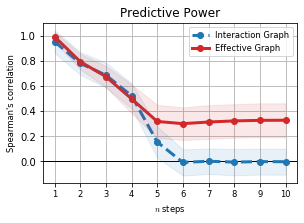

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4.25,3), sharex=True, sharey=True)
#
colors = ['#1f77b4', '#d62728']
labels = [r"Interaction Graph", r"Effective Graph"]
lss = ['--', '-']
for dft, color, label, ls in zip([dfgi, dfge], colors, labels, lss):
    #corrmean = np.nanmean(corr_mat[ip], axis=(0,1))
    #corrstd = np.nanstd(corr_mat[ip], axis=(0,1))
    xs = dft.index.get_level_values(level=1)
    print(xs)
    print(dft)
    mean = dft[('Correlation', 'mean')]
    std = dft[('Correlation', 'std')]
    print(mean)
    ax.fill_between( xs, (mean - std), (mean + std) , color=color, alpha=0.1,
            zorder=10)                 
    ax.plot(xs, mean, c=color, label=label,
            marker='o', ms=6, lw=3, ls=ls, zorder=5)
    
ax.axhline(0, c='#000000', lw=1, zorder=2)

ax.set_title("Predictive Power")
ax.set_ylabel("Spearman's correlation", fontsize='small')
ax.set_xlabel("$n$ steps", fontsize='small')
ax.set_xticks(xs)
ax.set_xticklabels(xs, fontsize='small')
#ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
#ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], fontsize='small')
#ax.set_xlim(0.75, 9.25)
#ax.set_ylim(0.5, 0.9)
ax.grid(zorder=1)
ax.legend(loc=0, fontsize='small')

plt.subplots_adjust(left=0.14, right=0.97, bottom=0.16, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig("Perturbations.pdf")
plt.show()